   pages   price
0    384  237200
1    320  245285
2    517  225939
3    352  345766
4    320  293793


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

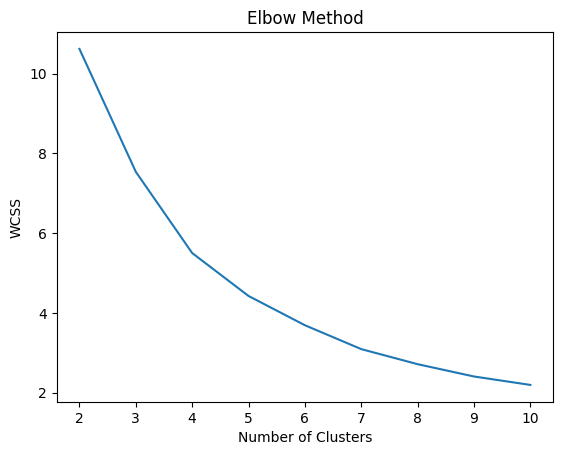

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


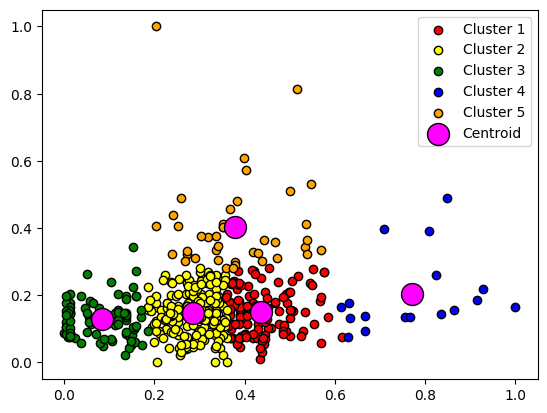

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Membaca data
data = pd.read_csv('halamanharga.csv')
data = data[['pages','price']]

# Menampilkan 5 baris pertama data
print(data.head())

#Normalisasi data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Menentukan nilai WCSS untuk tiap nilai k
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit_predict(data)
    wcss.append(kmeans.inertia_)

# Memplot atau menampilkan grafik elbow
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Melakukan klastering dengan k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
x = kmeans.fit_predict(data)


#Memvisualisasikan hasil clustering dengan menampilkan scatter plot
plt.scatter(data[x == 0, 0], data[x == 0, 1], c = "red", edgecolor='black', label = "Cluster 1")
plt.scatter(data[x == 1, 0], data[x == 1, 1], c = "yellow", edgecolor='black', label = "Cluster 2")
plt.scatter(data[x == 2, 0], data[x == 2, 1], c = "green", edgecolor='black', label = "Cluster 3")
plt.scatter(data[x == 3, 0], data[x == 3, 1], c = "blue", edgecolor='black', label = "Cluster 4")
plt.scatter(data[x == 4, 0], data[x == 4, 1], c = "orange", edgecolor='black', label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = "gray", edgecolor='black', label = "Centroid")

plt.legend()


